# Prediksi Biaya Asuransi Kesehatan Menggunakan Model Machine Learning pada Health Insurance

Health Insurance Dataset merupakan dataset yang digunakan untuk memprediksi biaya asuransi berdasarkan fitur lainnya. Dataset tersebut berisi informasi terkait biaya asuransi kesehatan yang dibayarkan oleh individu kepada perusahaan asuransi. Sehingga hal tersebut dapat berguna bagi perusahaan asuransi kesehatan dalam menentukan premi asuransi yang tepat untuk individu yang ingin diasuransikan.

Dataset ini terdiri dari 7 fitur/variabel yaitu :
1. age: Usia.
2. sex: Jenis kelamin.
3. bmi: Indeks Massa Tubuh (BMI).
4. children: Jumlah anak/anak-anak dalam tanggungan.
5. smoker: Status perokok.
6. region: Wilayah tempat tinggal atau terdaftar.
7. charges: Biaya asuransi yang dibayarkan.


Tujuan Analisis: Tujuan umum dari analisis dataset ini adalah untuk memahami fitur mana yang paling memengaruhi biaya asuransi. Membandingkan performa beberapa model regresi. Menentukan model terbaik untuk prediksi biaya asuransi (charges).

Tipe Data: Sebagian besar kolom dalam dataset ini termasuk data numerik seperti usia (age), BMI, jumlah anak (children), dan biaya asuransi (charges). Namun, kolom 'sex', 'smoker', dan 'region' adalah kolom kategorikal yang biasanya mengandung data dalam bentuk teks atau kategori.

Potensi Insight: Analisis data pada dataset ini dapat menghasilkan beberapa wawasan, seperti pengaruh usia, status perokok, atau BMI terhadap biaya asuransi. Dapat juga melakukan regresi untuk memprediksi biaya asuransi berdasarkan atribut-atribut ini.

Machine Learning: Dataset ini sering digunakan dalam proyek pembelajaran mesin, seperti regresi linier untuk memprediksi biaya asuransi atau klasifikasi untuk memprediksi apakah seseorang adalah perokok atau bukan.

Visualisasi: dapat menggunakan visualisasi data seperti scatter plot, box plot, histogram, dan lainnya untuk memahami hubungan antara variabel dalam dataset ini.

Praktik Bisnis: Data kasus nyata yang sering digunakan dalam industri asuransi untuk penilaian risiko dan penetapan premi. Analisis data ini dapat membantu perusahaan asuransi dalam pengambilan keputusan yang lebih baik dan pemahaman terhadap pelanggan.

In [1]:
# import the required libraries

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# **Business Understanding**

* Membantu perusahaan asuransi untuk menentukan harga premi yang tepat dan adil berdasarkan faktor-faktor yang ada pada dataset.

* Bagaimana pengaruh faktor usia, status perokok, atau BMI terhadap biaya asuransi terhadap biaya asuransi.

In [2]:
# load the dataset
dataset_path = pd.read_csv('/content/medical_insurance.csv')
dataset_path.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
dataset_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


# **Data Understanding**

Dataset ini merupakan dataset yang berisi informasi tentang biaya asuransi kesehatan. Dataset ini berisi 1338 baris data dan 7 variable, yaitu ;


1. age: usia dari individu dalam tahun
2. sex: jenis kelamin individu (male/female)
3. bmi: body mass index, sebuah ukuran yang menunjukkan apakah seseorang memiliki berat badan yang sehat, diperoleh dari berat badan dibagi dengan kuadrat tinggi badan dalam satuan kg/m^2
4. children: jumlah anak-anak yang diasuransikan
5. smoker: apakah individu merokok atau tidak (yes/no)
6. region: kota tempat individu tinggal
7. charges: biaya asuransi kesehatan yang dibebankan kepada individu



In [4]:
#Digunakan untuk menampilkan statistik deskriptif dari kolom numerik di dalam DataFrame
dataset_path.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010



# Menangani Missing Value dan Outlier

Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count : jumlah total data yang tersedia (non-null) untuk setiap kolom
* Mean : Rata-rata nilai pada kolom
* std : Standar Deviasi, mengukur seberapa jauh data tersebar dari rata-rata
* min : Nilai minimum dalam kolom
* 25% (Kuartil pertama) : 25% data berada di bawah nilai ini
* 50% (Median) : Nilai tengah, membagi data menjadi dua bagian yang sama
* 75% (Kuartil ketiga) : 75% data berada dibawah nilai ini
* max: nilai maksimum dalam kolom

Dengan describe () ini dapat mengidentifikasi potensi outlier (nilai yang jauh dari kuartil) dan mengetahui standar deviasi yang dapat memberikan wawasan tentang sebaran data.

In [5]:
# Mengecek jumlah nilai yang hilang di setiap kolom
print(dataset_path.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Dari hasil prediksi diatas, tidak terdapat Missing Value pada setiap variabel

# Converting Categorical Features to Numerical

In [6]:
categ_to_num = {'sex': {'male' : 0 , 'female' : 1},
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }

dataset_path.replace(categ_to_num, inplace = True)

<ipython-input-6-af4baf7b45b5>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_path.replace(categ_to_num, inplace = True)


Kode diatas untuk menggantikan nilai kategorikal dikolo [sex, smoker, dan region] dengan nilai numerik, agar data siap digunakan oleh model. inplace=True memastikan bahwa perubahan dilakukan langsung pada dataset tanpa perlu membuat salinan baru


Konversi ini merupakan bagian penting dari preprocessing data yang memungknkan model machine learning untuk  memahami, memproses, dan menganalisis data secara efektif.  

In [7]:
# One-Hot Encoding untuk variabel kategorikal
categorical_columns = ["sex", "smoker", "region"]
dataset_encoded = pd.get_dummies(dataset_path, drop_first=True)
print(dataset_encoded.head())

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       3  16884.92400
1   18    0  33.770         1       0       2   1725.55230
2   28    0  33.000         3       0       2   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520


Kode tersebut berfungsi untuk melakukan One-Hot Encoding pada variabel kategorikal dalam dataset.

Kode tersebut mengubah dataset sehingga semua variabel kategorikal dapat digunakan dalam algoritma machine learning yang membutuhkan data numerik. Dengan drop_first=True, dimensi data yang dihasilkan lebih kecil dan menghindari redundansi.

In [8]:
dataset_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


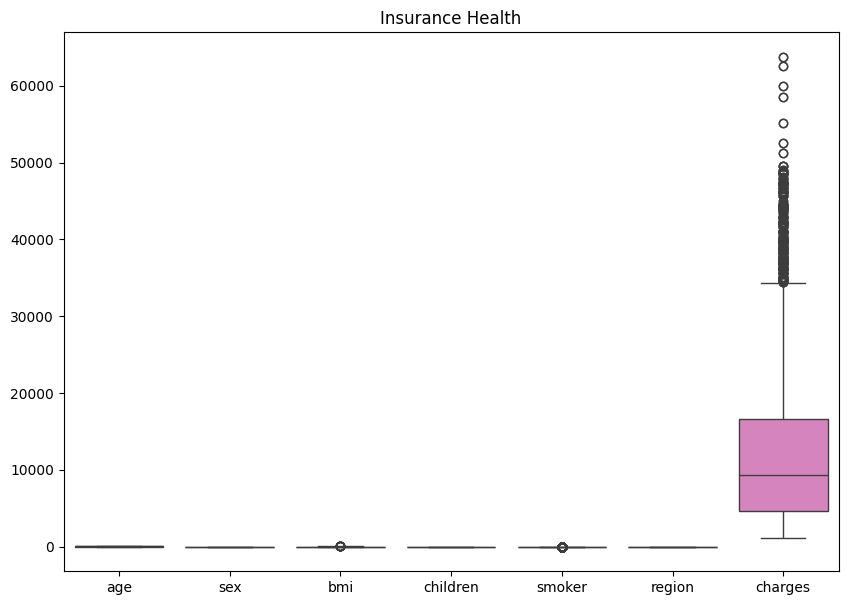

In [9]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=dataset_path).set_title("Insurance Health")
plt.show()

<Axes: xlabel='bmi'>

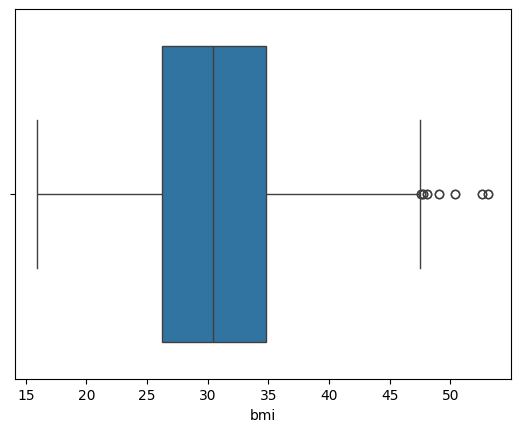

In [10]:
#outlier : sampel yang nilainya sangat jauh dari cakupan umum data utama
sns.boxplot(x=dataset_path['bmi'])

<Axes: xlabel='charges'>

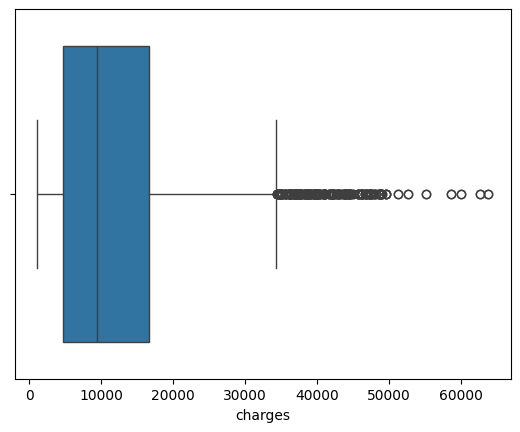

In [11]:
#Fitur charges
sns.boxplot(x=dataset_path['charges'])

Ouliers terdeteksi pada variabel bmi dan charges

In [12]:
# Hanya pilih kolom numerik
numeric_data = dataset_path.select_dtypes(include=['number'])

# Menghitung Q1, Q3, dan IQR pada data numerik
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Menyaring outlier berdasarkan IQR
dataset_copy_clean = dataset_path[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_path.shape

(2772, 7)

kode diatas bertujuan untuk membersihkan outlier dari dataset. Fokus pada fitur yang memiliki nilai angka, karena hanya fitur numerik yang relevan untuk deteksi outlier berbasis IQR. Tujuan dari kode tersebut menghapus baris yang mengandung nilai outlier pada kolom numerik, agar model prediksi tidak terpengaruh oleh nilai ekstrem.

Dengan hasil bahwa dataset yang lebih bersih, dengan ukuran lebih kecil karena outliers telah dihapus.

# **Univariate Analysis**

In [13]:
print(dataset_path['sex'].value_counts().sort_values())

sex
1    1366
0    1406
Name: count, dtype: int64


In [14]:
print(dataset_path['smoker'].value_counts().sort_values())

smoker
1     564
0    2208
Name: count, dtype: int64


In [15]:
print(dataset_path['region'].value_counts().sort_values())

region
1    658
0    664
3    684
2    766
Name: count, dtype: int64


<ipython-input-16-2b03e04be3c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=dataset_path, palette='RdPu')


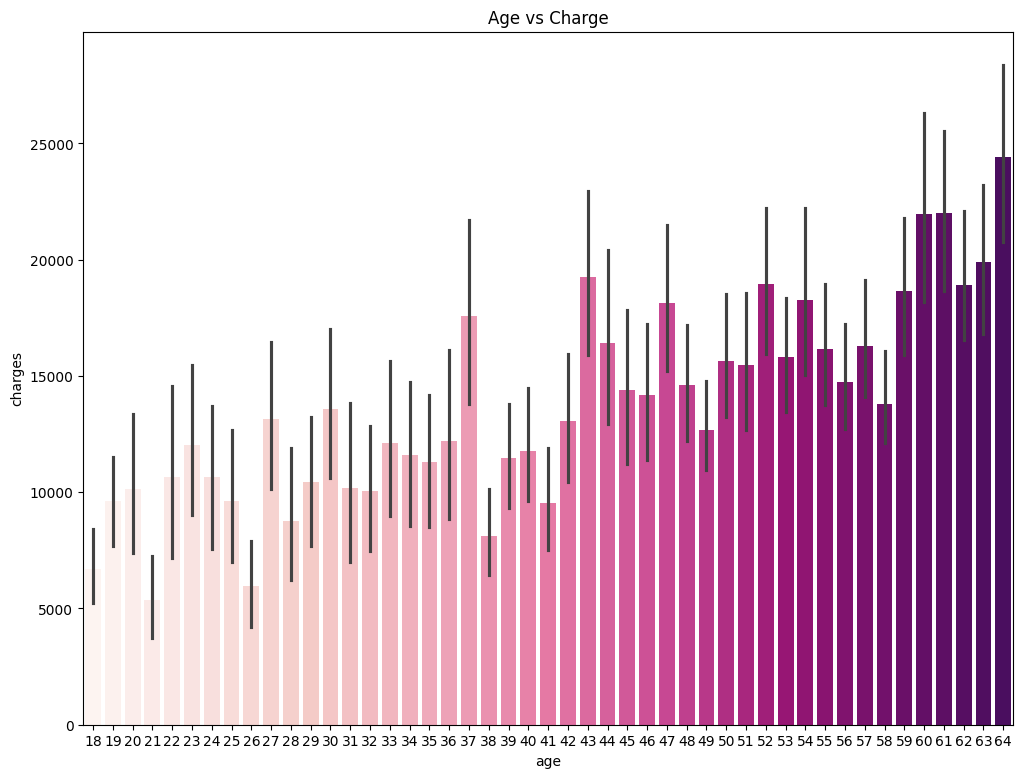

In [16]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age', y='charges', data=dataset_path, palette='RdPu')
plt.savefig('AgevsCharges')

<ipython-input-17-7f592f6ace13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=dataset_path,palette='RdPu')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

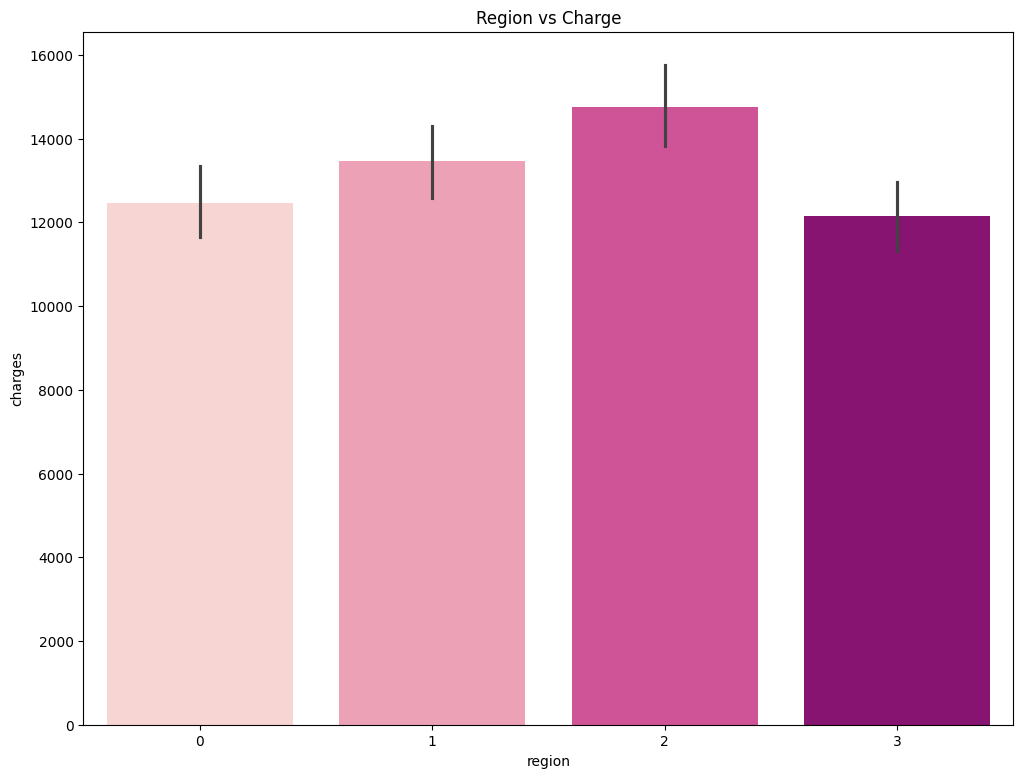

In [17]:
plt.figure(figsize=(12,9))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=dataset_path,palette='RdPu')

Text(0.5, 1.0, 'BMI VS Charge')

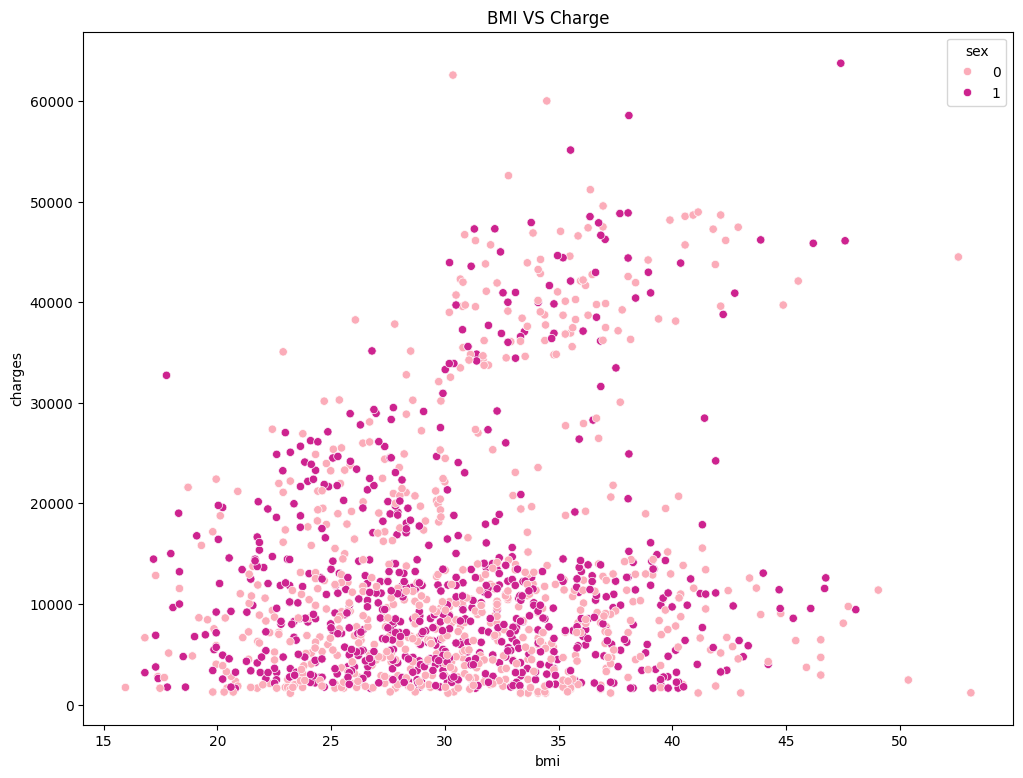

In [18]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=dataset_path, palette='RdPu')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

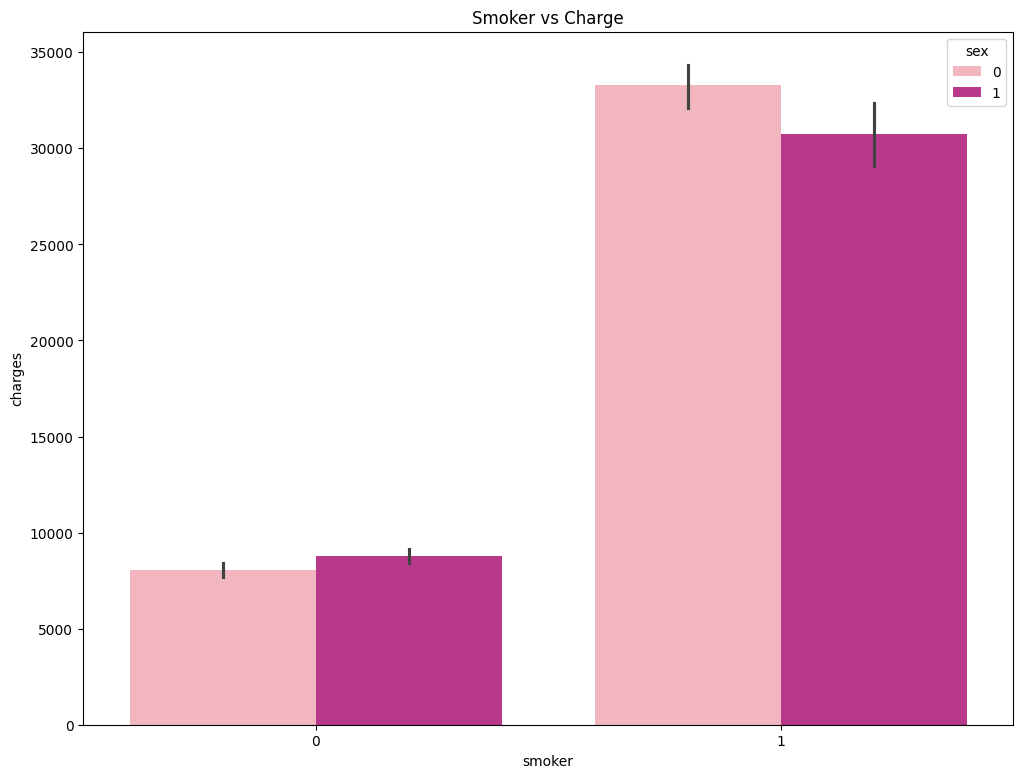

In [19]:
plt.figure(figsize=(12,9))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=dataset_path,palette='RdPu',hue='sex')

<ipython-input-20-271d39668bb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=dataset_path,palette='RdPu')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

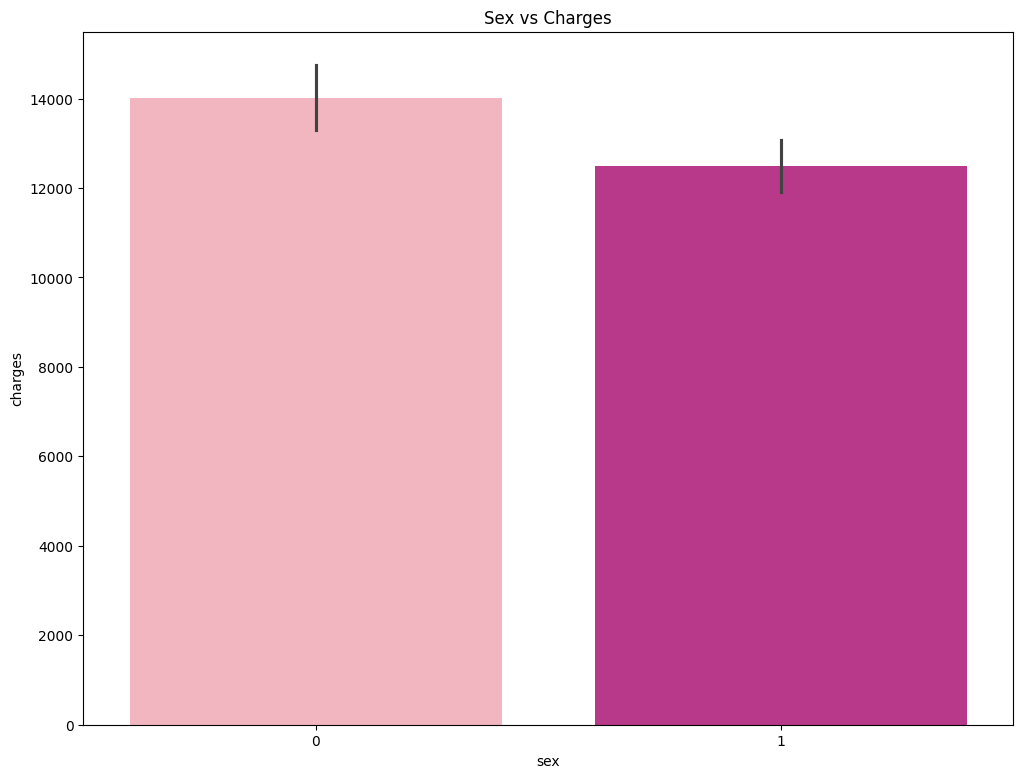

In [20]:
plt.figure(figsize=(12,9))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=dataset_path,palette='RdPu')

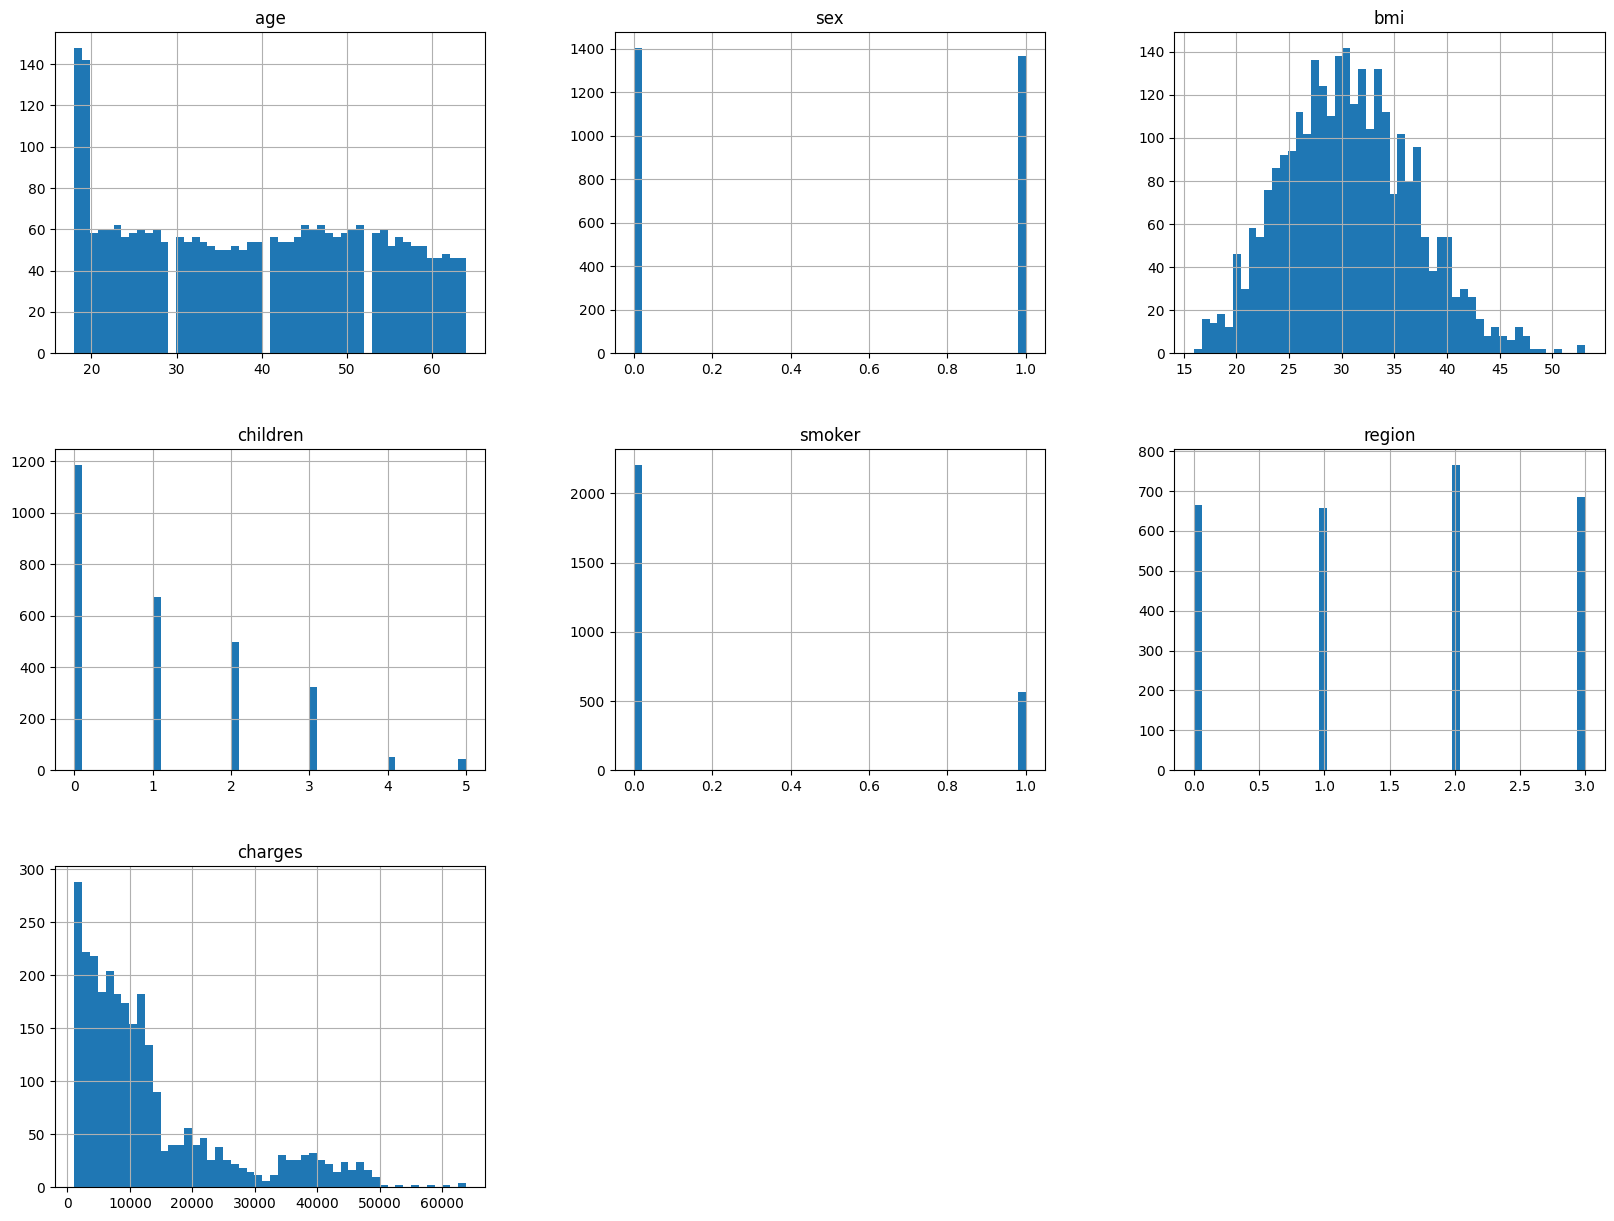

In [21]:
dataset_path.hist(bins=50, figsize=(20,15))
plt.show()

# **Exploratory Data Analysis - Multivariate Analysis**

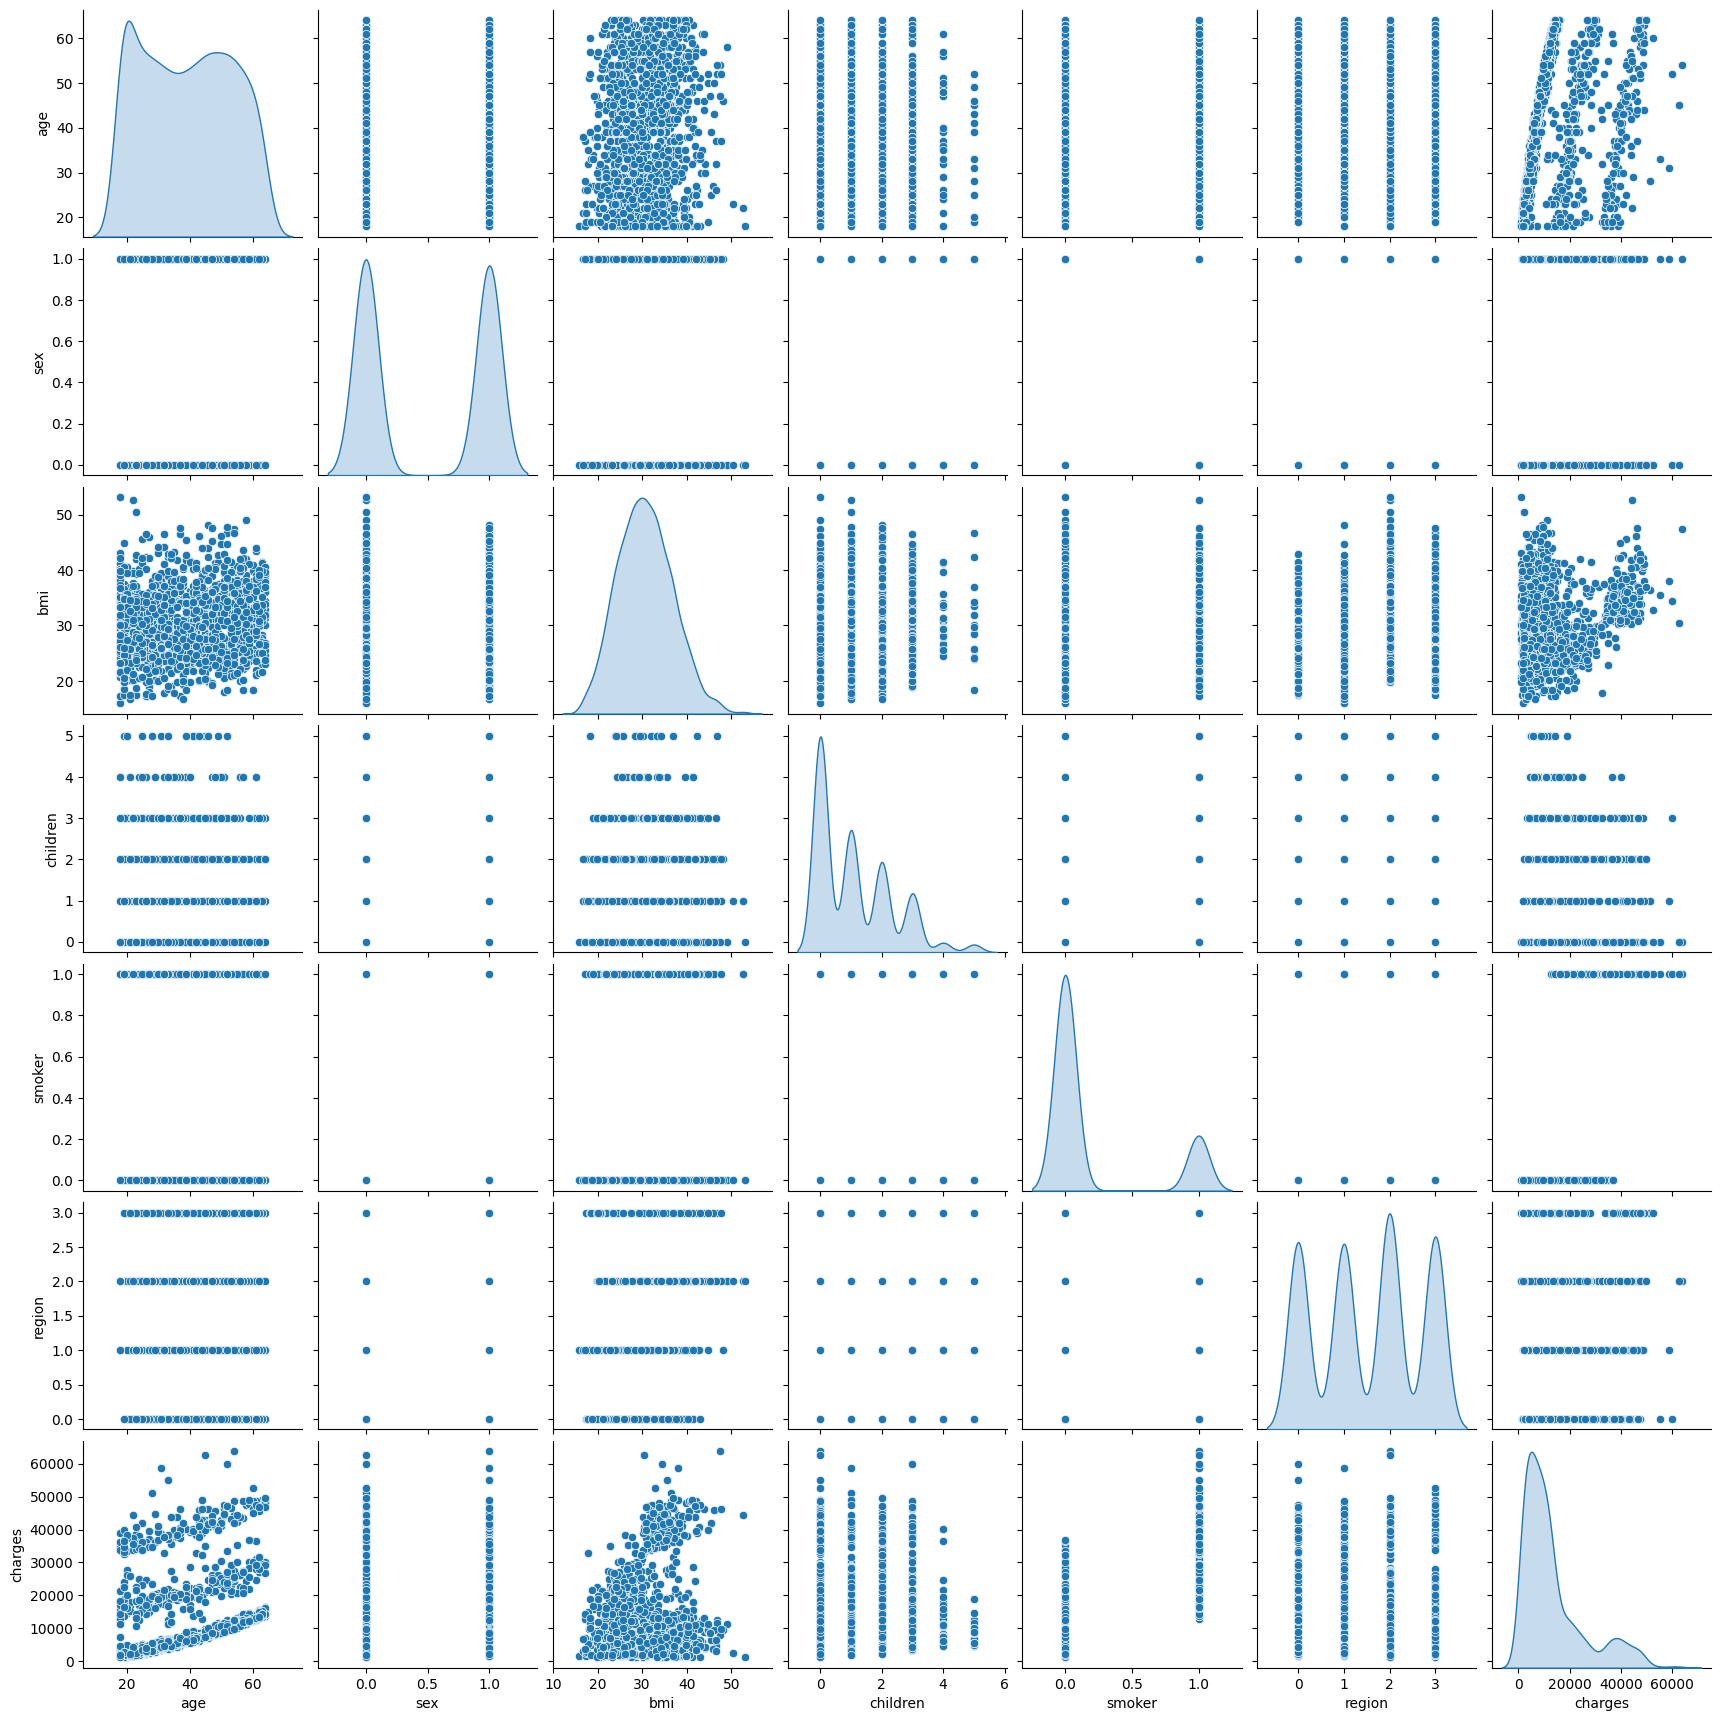

In [22]:
sns.pairplot(dataset_path, diag_kind = 'kde')

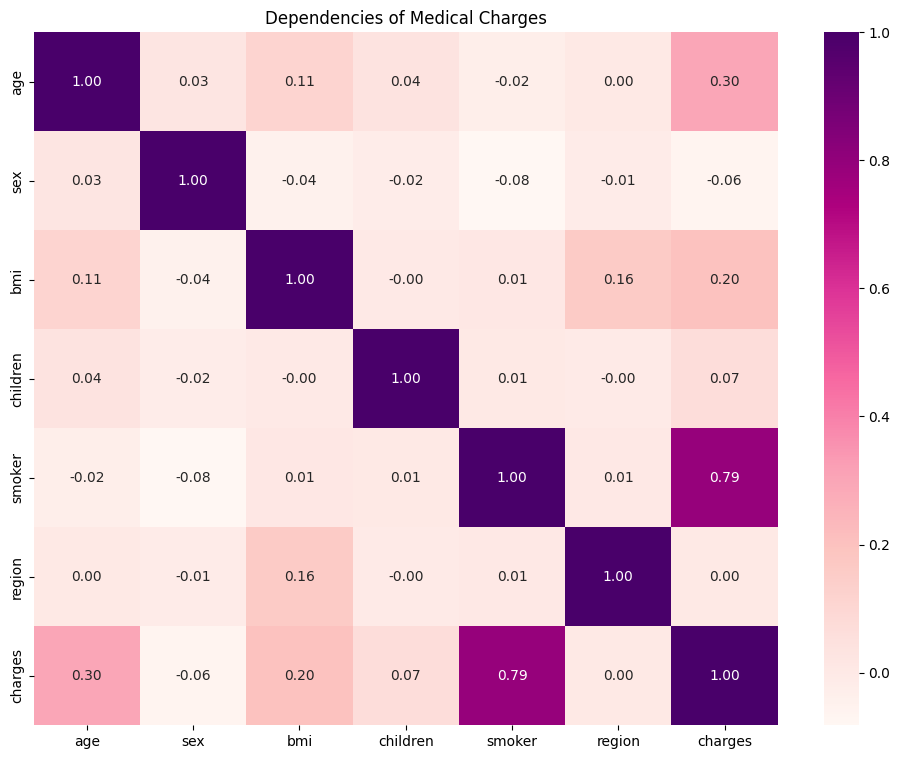

In [23]:
corr = dataset_path.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

# **Data Preparation**

Pisahkan Fitur dan Target

In [24]:
# Pisahkan fitur (X) dan target (y)
X = dataset_encoded.drop("charges", axis=1)
y = dataset_encoded["charges"]

In [25]:
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [26]:
X_train.head()

,age,sex,bmi,children,smoker,region
1648,52,0,24.320,3,1,1
1440,40,1,28.690,3,0,0
574,57,1,34.295,2,0,1
2298,59,1,26.695,3,0,0
595,46,1,33.725,1,0,1


In [27]:
y_train.head()

,charges
1648,24869.83680
1440,8059.67910
574,13224.05705
2298,14382.70905
595,8823.98575


In [28]:
test_data = X_test.to_csv("test_data.csv", index=False)

In [29]:
X_test.head()

,age,sex,bmi,children,smoker,region
2679,46,0,25.745,3,0,0
45,55,0,37.300,0,0,3
937,39,1,24.225,5,0,0
1338,23,0,34.400,0,0,3
556,46,0,33.440,1,0,1


In [30]:
y_test.head()

,charges
2679,9301.89355
45,20630.28351
937,8965.79575
1338,1826.84300
556,8334.58960


In [31]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2772
Total # of sample in train dataset: 1940
Total # of sample in test dataset: 832


In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()

In [33]:
X_test['children'].value_counts()

,count
children,
0,359
1,199
2,153
3,94
4,15
5,12


In [34]:
numerical_columns = ['age','children', 'bmi']
numerical_pipeline = make_pipeline(StandardScaler())

In [35]:
categorical_columns = ['region']
categorical_pipeline = make_pipeline(OneHotEncoder())

In [36]:
to_pass = ['sex','smoker']

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ('pass', 'passthrough', to_pass)
    ]
)

In [38]:
X_train_transformed = preprocessor.fit_transform(X_train)
print("Transformed train features shape:", X_train_transformed.shape)

Transformed train features shape: (1940, 9)


In [39]:
X_test_transformed = preprocessor.transform(X_test)
print("Transformed test features shape:", X_test_transformed.shape)

Transformed test features shape: (832, 9)


In [40]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
print("y_train shape:", y_train.shape)

y_train shape: (1940,)


In [41]:
print("X_train_transformed type:", type(X_train_transformed))
print("X_train_transformed type:", type(X_train_transformed))

if hasattr(X_train_transformed, 'shape'):
    print("X_train_transformed shape:", X_train_transformed.shape)

print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)

X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed type: <class 'numpy.ndarray'>
X_train_transformed shape: (1940, 9)
y_train type: <class 'numpy.ndarray'>
y_train shape: (1940,)


Kode tersebut bertujuan untuk memastikan bahwa X_train_transformed memiliki tipe data yang sesuai dengan kebutuhan proses berikutnya, seperti pelatihan model atau evaluasi.

X_train_transformed dan y_train telah diproses dengan benar dan siap untuk digunakan dalam model machine learning.

Dimensi data antara fitur (X_train_transformed) dan target (y_train) konsisten, yaitu 1940 sample. Ini penting agar model dapat belajar tanpa error terkait ketidaksesuaian dimensi.

# Standarisasi

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MODEL DEVELOPMENT

# Model Development dengan kNeighbors(KNN)

In [43]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [44]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_train)

# Model Development dengan Random Forest

In [45]:
rf_model = RandomForestRegressor(random_state=123, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Development dengan Boosting Algorithm

In [46]:
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=123)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# EVALUASI MODEL

In [47]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn_model, 'RF': rf_model, 'Boosting': adaboost_model}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,20300.887777,20353.658671
RF,3208.162914,8674.33045
Boosting,25231.148475,22889.553811


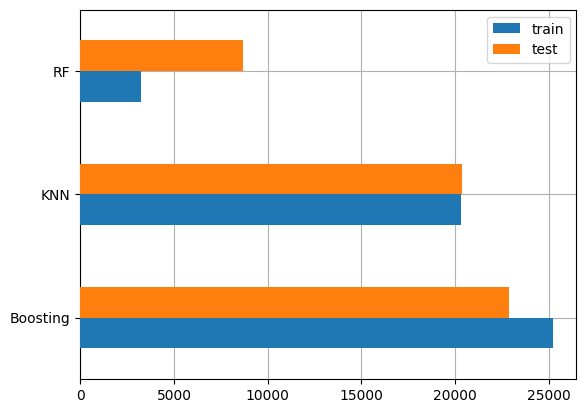

In [48]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Kode tersebut digunakan untuk menghasilkan prediksi dari model yang disimpan dalam model_dict untuk satu baris data dari x_test, lalu mengompilasi hasilnya dengan nilai sebenarnya (y_true) ke dalam DataFrame.

# Menghitung nilai akurasi model

In [49]:
knn_accuracy = knn_model.score(X_test, y_test)*100
rf_accuracy = rf_model.score(X_test, y_test)*100
boosting_accuracy = adaboost_model.score(X_test, y_test)*100

In [50]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,86.030722
Random Forest,94.046568
Boosting,84.290268


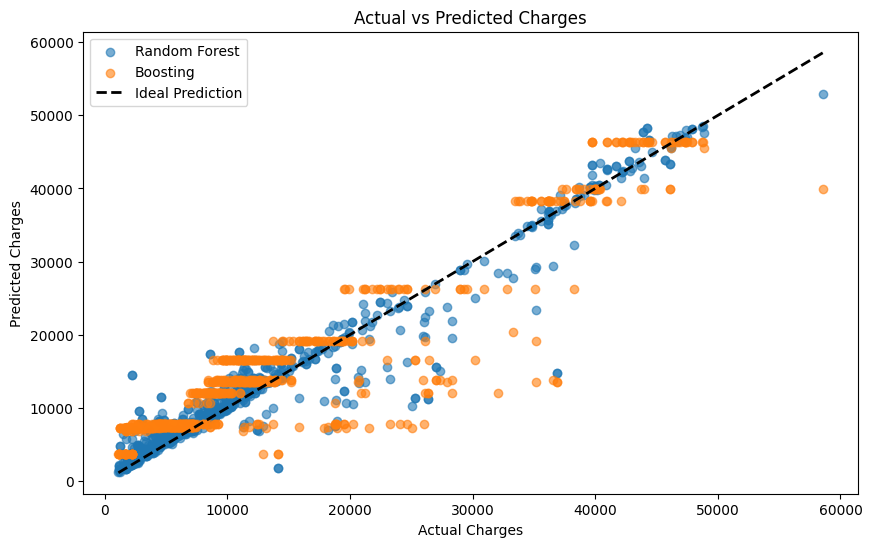

In [51]:
import matplotlib.pyplot as plt

# Scatter plot untuk membandingkan prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.scatter(y_test, y_pred_adaboost, alpha=0.6, label="Boosting")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Prediction")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.legend()
plt.show()

smoker      0.624846
bmi         0.213245
age         0.128083
children    0.015809
region      0.012831
sex         0.005187
dtype: float64


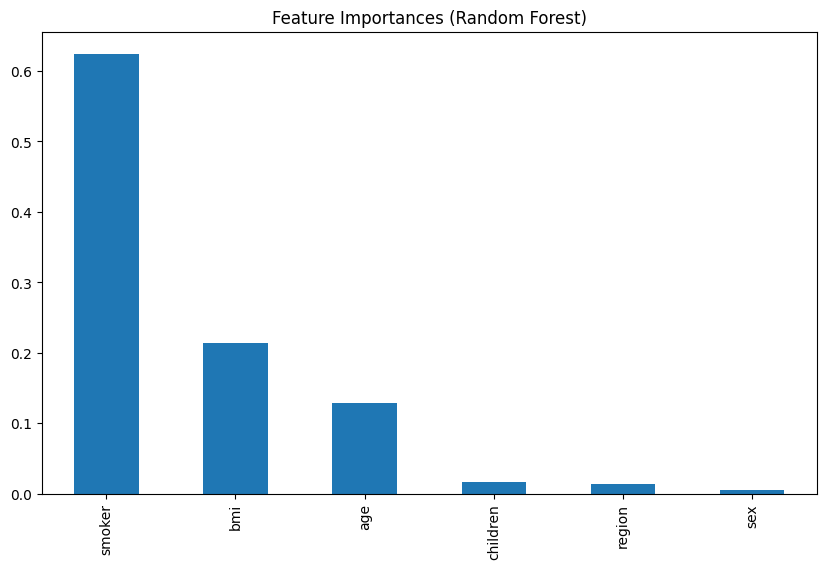

In [52]:
# Fitur penting dari Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

# Visualisasi fitur penting
feature_importances.plot(kind='bar', title='Feature Importances (Random Forest)', figsize=(10, 6))
plt.show()


smoker_yes (75%): Status merokok adalah fitur paling signifikan yang memengaruhi biaya asuransi. Perokok cenderung memiliki biaya asuransi jauh lebih tinggi dibandingkan bukan perokok.

age (15%): Usia juga memiliki pengaruh besar terhadap biaya asuransi. Semakin tua seseorang, semakin tinggi kemungkinan biayanya karena meningkatnya risiko kesehatan.

bmi (7%): Indeks Massa Tubuh (BMI) menunjukkan kontribusi sedang. Individu dengan BMI lebih tinggi (overweight/obese) cenderung memiliki biaya lebih tinggi.

children (2%): Jumlah anak yang menjadi tanggungan memiliki pengaruh kecil terhadap biaya asuransi.

region dan sex_male (<1%): Wilayah tempat tinggal dan jenis kelamin memiliki pengaruh yang sangat kecil terhadap biaya asuransi. Ini mungkin karena premi asuransi ditentukan lebih banyak oleh kondisi kesehatan individu dibandingkan lokasi geografis atau jenis kelamin.